In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import random

In [ ]:
def load_data(filename : str, ds : str) -> pd.DataFrame:
    '''
    Load, unit, clean target data from input file
    :param filename path to source file
    :param ds name of trg xls file
    '''
    dfs = []
    with zipfile.ZipFile(filename, 'r') as trg_zip:
        for item in trg_zip.namelist():
            if ds in item:
                with trg_zip.open(item) as trg_file:  # check trg file
                    dfs.extend(pd.read_html(trg_file, encoding='cp1250'))
    df = pd.concat(dfs)  # all trg tabels to one
    return df.drop(columns=[col for col in df.columns if "Unnamed" in str(col)])  # drop unnamed columns
df = load_data('data_23_24.zip', 'nehody')
print(df)

                 p1         p2a   p2b  p4a  p4b  p4c  p5a  p6  p7  p8  ...  \
0       10623000002  01.01.2023  1730    1    7   12    2   5   0   0  ...   
1       60223000039  10.01.2023   916    6    2   10    1   3   0   3  ...   
2          23000455  15.01.2023  1930    0   11   20    1   1   4   0  ...   
3       70623000019  10.01.2023   815    7    6   18    2   5   0   0  ...   
4      161723000024  11.01.2023  1730   16   17   17    2   5   0   0  ...   
...             ...         ...   ...  ...  ...  ...  ...  ..  ..  ..  ...   
69696  140824000888  04.10.2024   620   14    8   17    2   5   0   0  ...   
69697  140824000887  03.10.2024  2230   14    8   17    2   5   0   0  ...   
69698  140824000886  03.10.2024  2030   14    8   19    2   5   0   0  ...   
69699  140824000885  03.10.2024  1260   14    8   19    1   3   0   6  ...   
69700   11624000662  03.10.2024  1010    1   16   21    2   1   4   0  ...   

       p23  p24  p27  p28  p34  p35  p36      p37      p38  p39

In [14]:
def parse_data(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    '''
    Filters and modifies input data into a form convenient for further analysis
    :param df input data in dataframe
    :param verbose boolean flag for size outpout data display
    '''
    REGION_DICT = {0: "PHA", 1: "STC", 2: "JHC", 3: "PLK", 4: "ULK", 5: "HKK",6:
    "JHM", 7: "MSK", 14: "OLK", 15: "ZLK", 16: "VYS", 17: "PAK", 18:
    "LBK", 19: "KVK"}
    
    new_df = df.copy()
    new_df['date'] = pd.to_datetime(df['p2a'], dayfirst=True, yearfirst=False, format=None, errors='coerce')
    new_df['region'] = new_df['p4a'].apply(lambda x: REGION_DICT[x])

    new_df.drop_duplicates(subset=['p1'], inplace=True)
    
    if verbose:
        new_size = new_df.memory_usage(deep=True).sum()/1_000_000
        print(f'new_size={new_size} MB')
    
    return new_df

out = parse_data(df, True)
print(df['p2a'])

new_size=69.645258 MB
0        01.01.2023
1        10.01.2023
2        15.01.2023
3        10.01.2023
4        11.01.2023
            ...    
69696    04.10.2024
69697    03.10.2024
69698    03.10.2024
69699    03.10.2024
69700    03.10.2024
Name: p2a, Length: 164646, dtype: object


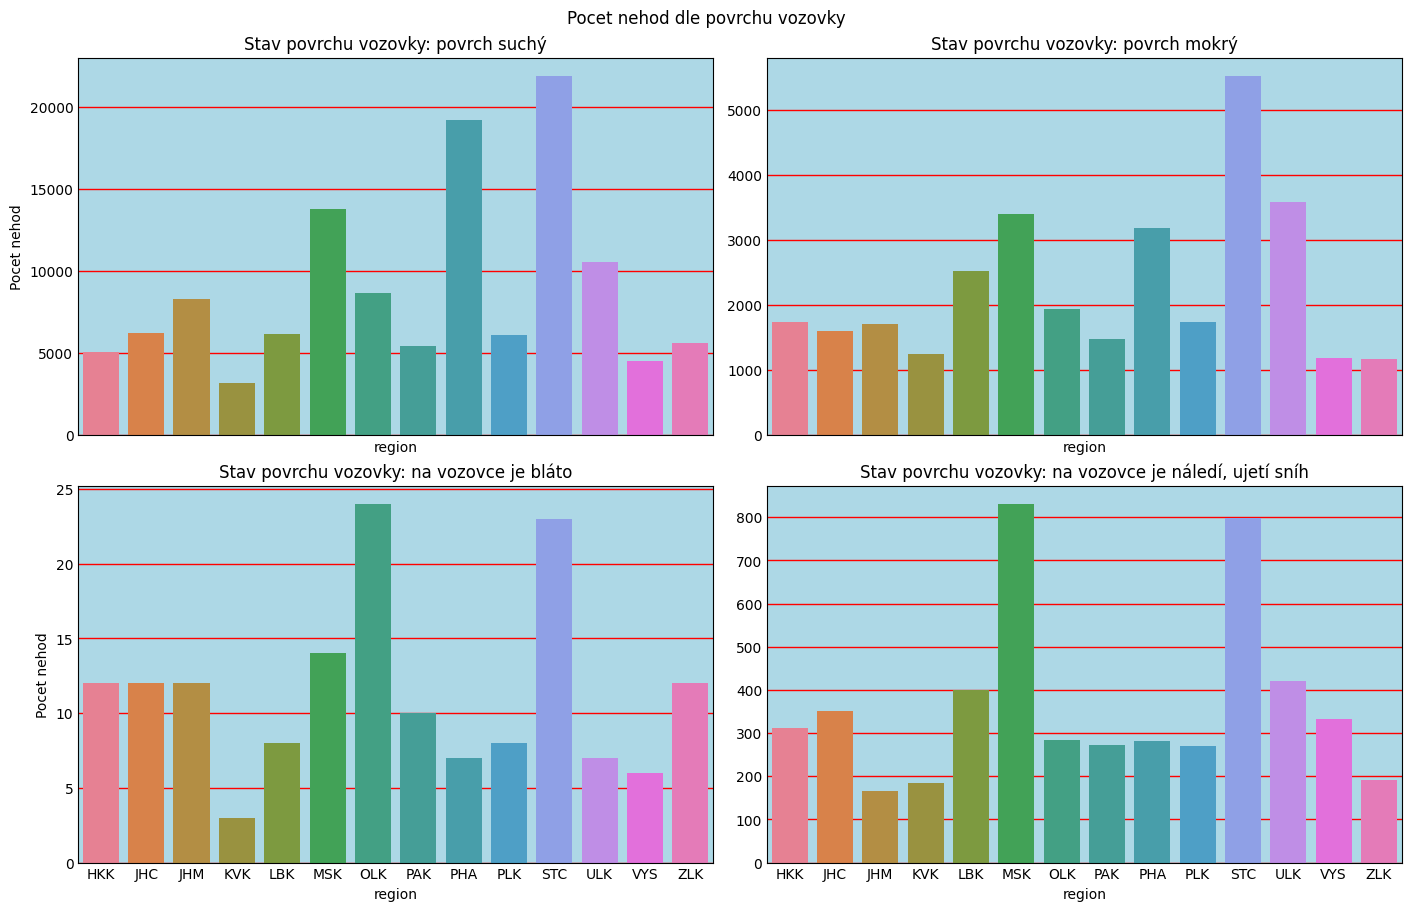

In [58]:
# Ukol 3: počty nehod v jednotlivých regionech podle stavu vozovky
def plot_state(df: pd.DataFrame, fig_location: str = None,
                    show_figure: bool = False)->None:
    '''
    Create accident number chart and save it on target file with optional displaying.
    
    Args:
        df (pd.DataFrame): input data for accident.
        fig_location (str|None, optional): path/name for target file for saving. Defaults to None.
        show_figure (bool): flag for optional displaying. Defaults to False.

    Returns:
        None
    '''
    
    DICT_SURFACE_CONDITION = {1:'povrch suchý', 2:'povrch suchý', 3:'povrch mokrý', 4: 'na vozovce je bláto', 5:'na vozovce je náledí, ujetí sníh', 6:'na vozovce je náledí, ujetí sníh'}
    SURFACE_CONDITION = set(DICT_SURFACE_CONDITION.values())
    
    df_aux = df.copy()
    df_aux['p16'] = df_aux['p16'].replace(DICT_SURFACE_CONDITION)  # transform surface condition to trg string
    
    fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(14,9))  # set chart
    fig.suptitle('Pocet nehod dle povrchu vozovky')
    for i, cond in enumerate(SURFACE_CONDITION):
        row = i // 2  # indexing by axes on chart
        col = i % 2
        
        trg_grouping = df_aux[df_aux['p16']==cond].groupby('region').count()['p1']  # statistics on accidents in the regions
        sns.barplot(ax=axes[row, col], x=trg_grouping.index, y=trg_grouping.values, hue=trg_grouping.index, zorder=2) # statistic chart
        
        # expected format
        axes[row, col].set_facecolor("lightblue")
        axes[row, col].grid(axis="y", color="red", linewidth=1, zorder=0)
        axes[row, col].tick_params(axis='x',width=0, length=0)
        axes[row, col].tick_params(axis='y',width=0, length=0)
        if col == 0:
            axes[row, col].set_ylabel('Pocet nehod')
        if row == 0:
            axes[row, col].tick_params(labelbottom=False)
        axes[row, col].title.set_text(f'Stav povrchu vozovky: {cond}')
    
    if show_figure:
        plt.show()
    if fig_location is not None:
        plt.savefig(fig_location)

plot_state(out, '')

In [5]:
164646 

164646